## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# importing and loading modules/libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
#loading csv data

df_kc = pd.read_csv('data/kc_house_data.csv', index_col='id')
df_kc

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


## Drop unnecessary columns

In [3]:
df_kc.drop(['date', 'yr_renovated','condition','zipcode','sqft_basement'],axis=1, inplace=True)


In [4]:
df_kc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,7 Average,1180,1955,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,7 Average,2170,1951,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,6 Low Average,770,1933,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,7 Average,1050,1965,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,8 Good,1680,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,8 Good,1530,2009,47.6993,-122.346,1530,1509
6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,8 Good,2310,2014,47.5107,-122.362,1830,7200
1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,7 Average,1020,2009,47.5944,-122.299,1020,2007


In [5]:
df_kc['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [6]:
#Filtering out data to only include bedrooms with 5 or less

df_kc=df_kc[df_kc['bedrooms']<=5]

In [7]:
df_kc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,7 Average,1180,1955,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,7 Average,2170,1951,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,6 Low Average,770,1933,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,7 Average,1050,1965,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,8 Good,1680,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,8 Good,1530,2009,47.6993,-122.346,1530,1509
6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,8 Good,2310,2014,47.5107,-122.362,1830,7200
1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,7 Average,1020,2009,47.5944,-122.299,1020,2007


In [8]:
#Filtering out data to only include bathrooms with 4 or less

df_kc=df_kc[df_kc['bathrooms']<=4]

In [9]:
df_kc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,7 Average,1180,1955,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,7 Average,2170,1951,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,6 Low Average,770,1933,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,7 Average,1050,1965,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,8 Good,1680,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,8 Good,1530,2009,47.6993,-122.346,1530,1509
6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,8 Good,2310,2014,47.5107,-122.362,1830,7200
1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,7 Average,1020,2009,47.5944,-122.299,1020,2007


In [10]:
# Replace missing values

# def replace_missing(val, probs):
#     if np.isnan(val):
#         return np.random.choice(probs.index, p = probs)
#     else:
#         return val
# for col in ["waterfront", "view"]:
#     # get weights of unique values
#     unique_p = df_kc[col].value_counts(normalize = True)
#     # apply function above
#     df_kc[col] = df_kc[col].apply(replace_missing, args = (unique_p,))
#     print("The number of missing values in {} is:".format(col), df_kc[col].isna().sum())
# print("--------------------------------------")
# print("Missing values per column:")
# # last check to see if there are missing values
# df_kc.isna().sum()

In [11]:
df_kc['waterfront'] = df_kc['waterfront'].fillna('NO')

<ipython-input-11-82cac8dfd3dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc['waterfront'] = df_kc['waterfront'].fillna('NO')


In [12]:
df_kc['waterfront'] = df_kc['waterfront'].replace(["NO"], 0).replace(["YES"], 1)

<ipython-input-12-f20009d41a9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc['waterfront'] = df_kc['waterfront'].replace(["NO"], 0).replace(["YES"], 1)


In [13]:
df_kc['waterfront'].value_counts()

0    20934
1      127
Name: waterfront, dtype: int64

In [14]:
df_kc['view'].value_counts()

NONE         19039
AVERAGE        903
GOOD           466
FAIR           317
EXCELLENT      277
Name: view, dtype: int64

In [15]:
df_kc['view'] = df_kc['view'].replace(["NONE"], 0).replace(["FAIR"], 1).replace(["AVERAGE"], 2).replace(["GOOD"], 3).replace(["EXCELLENT"], 4)

<ipython-input-15-a5d6b6e2af0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc['view'] = df_kc['view'].replace(["NONE"], 0).replace(["FAIR"], 1).replace(["AVERAGE"], 2).replace(["GOOD"], 3).replace(["EXCELLENT"], 4)


In [16]:
df_kc['view'].value_counts()

0.0    19039
2.0      903
3.0      466
1.0      317
4.0      277
Name: view, dtype: int64

In [17]:
#checking prices of homes

df_kc['price'].sort_values(ascending=False)[:50]

id
3835500195    4490000.0
7397300170    3710000.0
4389201095    3650000.0
2425049063    3640000.0
4114601570    3600000.0
3126059023    3400000.0
1118000320    3400000.0
9808100150    3350000.0
3625059152    3300000.0
7524900003    3280000.0
8964800890    3200000.0
251500080     3200000.0
624069108     3200000.0
3025059124    3170000.0
333100295     3120000.0
4131900066    3100000.0
3760500116    3070000.0
1732800780    3070000.0
1925059254    3000000.0
8964800330    3000000.0
1118000340    3000000.0
518500480     3000000.0
9808100100    3000000.0
3625049014    2950000.0
6613000930    2950000.0
6447300365    2900000.0
7159200040    2900000.0
2624049091    2900000.0
7960900060    2900000.0
1118000301    2890000.0
2303900090    2880000.0
6065300840    2850000.0
1069000070    2800000.0
3859900060    2750000.0
7397300220    2750000.0
624069035     2750000.0
2525049086    2720000.0
8043700300    2700000.0
5442300807    2700000.0
2524069078    2700000.0
625059036     2700000.0
2525049263   

In [18]:
# checking data types

df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21061 entries, 7129300520 to 1523300157
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21061 non-null  float64
 1   bedrooms       21061 non-null  int64  
 2   bathrooms      21061 non-null  float64
 3   sqft_living    21061 non-null  int64  
 4   sqft_lot       21061 non-null  int64  
 5   floors         21061 non-null  float64
 6   waterfront     21061 non-null  int64  
 7   view           21002 non-null  float64
 8   grade          21061 non-null  object 
 9   sqft_above     21061 non-null  int64  
 10  yr_built       21061 non-null  int64  
 11  lat            21061 non-null  float64
 12  long           21061 non-null  float64
 13  sqft_living15  21061 non-null  int64  
 14  sqft_lot15     21061 non-null  int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 2.6+ MB


In [19]:
#checking 'grade' column and found that we need to split the data

df_kc['grade'].value_counts()

7 Average        8846
8 Good           5948
9 Better         2556
6 Low Average    2030
10 Very Good     1043
11 Excellent      310
5 Fair            239
12 Luxury          57
4 Low              27
13 Mansion          4
3 Poor              1
Name: grade, dtype: int64

In [20]:
#splitting the data column

df_kc['grade']=df_kc.grade.str.split(expand=True)

<ipython-input-20-099a5cf6fe4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc['grade']=df_kc.grade.str.split(expand=True)


In [21]:
#casting the string into an int

df_kc['grade']=df_kc['grade'].astype(int)

<ipython-input-21-3aa15f922f31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc['grade']=df_kc['grade'].astype(int)


In [22]:
#checking the grade column to make sure it is split correctly

df_kc['grade']

id
7129300520    7
6414100192    7
5631500400    6
2487200875    7
1954400510    8
             ..
263000018     8
6600060120    8
1523300141    7
291310100     8
1523300157    7
Name: grade, Length: 21061, dtype: int64

In [23]:
#verifying that 'grade' is an int

df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21061 entries, 7129300520 to 1523300157
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21061 non-null  float64
 1   bedrooms       21061 non-null  int64  
 2   bathrooms      21061 non-null  float64
 3   sqft_living    21061 non-null  int64  
 4   sqft_lot       21061 non-null  int64  
 5   floors         21061 non-null  float64
 6   waterfront     21061 non-null  int64  
 7   view           21002 non-null  float64
 8   grade          21061 non-null  int64  
 9   sqft_above     21061 non-null  int64  
 10  yr_built       21061 non-null  int64  
 11  lat            21061 non-null  float64
 12  long           21061 non-null  float64
 13  sqft_living15  21061 non-null  int64  
 14  sqft_lot15     21061 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 2.6 MB


In [24]:
#determining which columns to look at

x_columns = ['bedrooms', 'waterfront', 'view', 'bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','yr_built', 'sqft_living15','sqft_lot15']

df_kc2 = df_kc[x_columns]
df_kc2['price'] = df_kc['price']
df_kc = df_kc2

<ipython-input-24-66bbf8c5479f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc2['price'] = df_kc['price']


In [25]:
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21061 entries, 7129300520 to 1523300157
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21061 non-null  int64  
 1   waterfront     21061 non-null  int64  
 2   view           21002 non-null  float64
 3   bathrooms      21061 non-null  float64
 4   sqft_living    21061 non-null  int64  
 5   sqft_lot       21061 non-null  int64  
 6   floors         21061 non-null  float64
 7   grade          21061 non-null  int64  
 8   sqft_above     21061 non-null  int64  
 9   yr_built       21061 non-null  int64  
 10  sqft_living15  21061 non-null  int64  
 11  sqft_lot15     21061 non-null  int64  
 12  price          21061 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 2.2 MB


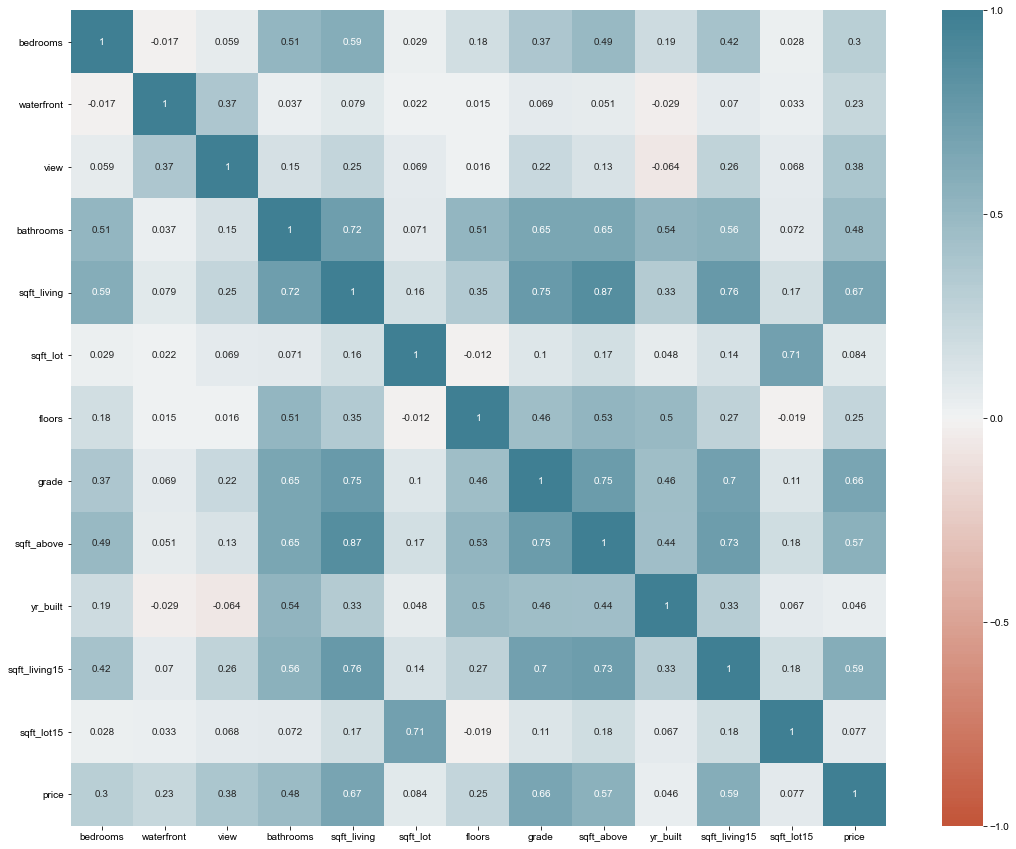

In [26]:
#creating heatmap to get a better visual of the data's correlation

corr = df_kc.corr()
fig,ax=plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True,
xticklabels = corr.columns.values,
yticklabels = corr.columns.values,
vmin = -1,
vmax = 1,
center = 0,
cmap = sns.diverging_palette(20, 220, n = 200),
square = True)
sns.set(font_scale=5)
plt.show()

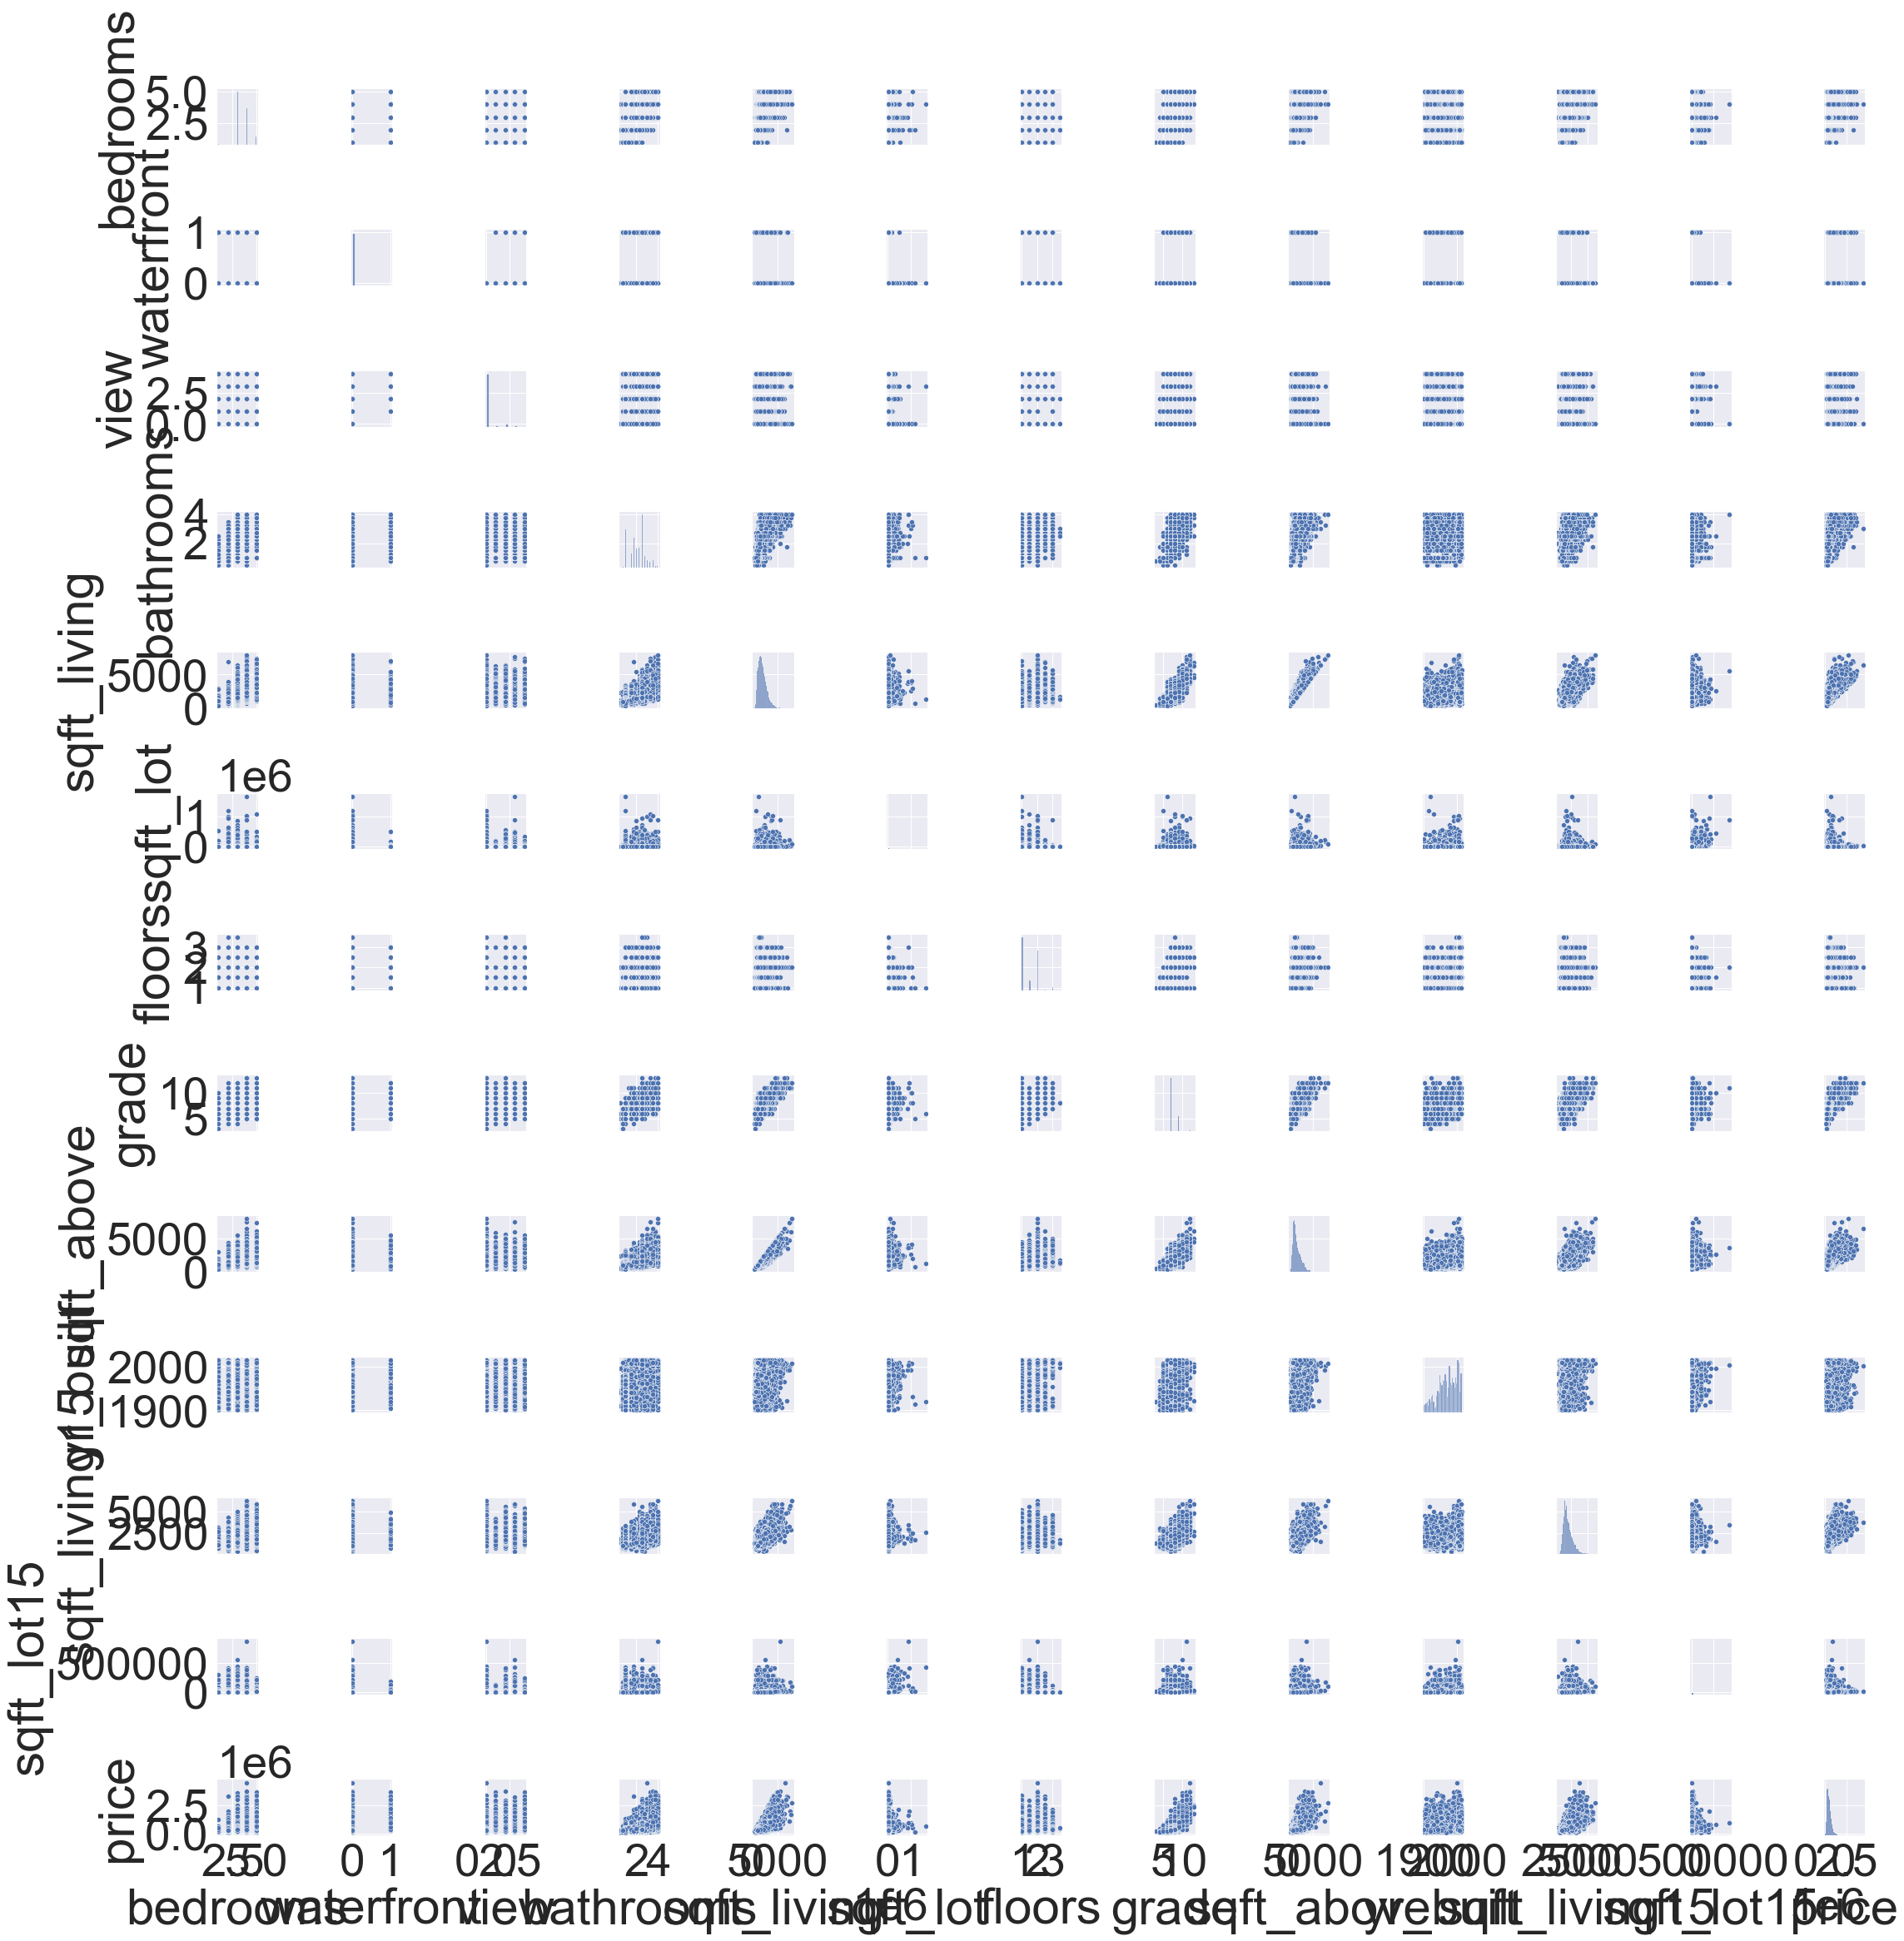

In [27]:
#Create Pair Plot
sns.pairplot(df_kc)
# sns.pairplot(df_kc, vars = ['bedrooms', 'waterfront', 'view', 'bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','yr_built', 'sqft_living15','sqft_lot15'], dropna = True)

In [44]:
#

features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .2 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [45]:
corr_price_df


,Correlations,Features
4,0.671091,sqft_living
6,0.664058,grade
8,0.591469,sqft_living15
7,0.569847,sqft_above
3,0.476202,bathrooms
2,0.378410,view
0,0.299802,bedrooms
5,0.252606,floors
1,0.232981,waterfront


In [46]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .70 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], ascending=False)

In [47]:
# Trying to identify any multi collinearity, and which variables are highly correlated with each other

MC_df

,Correlations,Features
3,0.866220,"[sqft_living, sqft_above]"
9,0.866220,"[sqft_above, sqft_living]"
4,0.763473,"[sqft_living, sqft_living15]"
12,0.763473,"[sqft_living15, sqft_living]"
2,0.754325,"[sqft_living, grade]"
6,0.754325,"[grade, sqft_living]"
7,0.745109,"[grade, sqft_above]"
10,0.745109,"[sqft_above, grade]"
11,0.733418,"[sqft_above, sqft_living15]"
14,0.733418,"[sqft_living15, sqft_above]"


In [54]:
price = df_kc['price']
bath = df_kc['bathrooms']
bed = df_kc['bedrooms']
grade = df_kc['grade']
sqft_living15 = df_kc['sqft_living15']
floors = df_kc['floors']
sqft_living = df_kc['sqft_living']
sqft_above = df_kc['sqft_above']
waterfront = df_kc['waterfront']
view = df_kc['view']
price_log = np.log(df_kc['price'])
bath_log = np.log(df_kc['bathrooms'])
bed_log = np.log(df_kc['bedrooms'])
grade_log = np.log(df_kc['grade'])
sqft_living15_log = np.log(df_kc['sqft_living15'])
floors_log = np.log(df_kc['floors'])
sqft_living_log = np.log(df_kc['sqft_living'])
sqft_above_log = np.log(df_kc['sqft_above'])
waterfront_log = np.log(df_kc['waterfront'])
view_log = np.log(df_kc['view'])

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [55]:
def model_diagnostic(model, x, x_name, y):
    residuals = model.resid
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=85, fontname='arial')
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50, fontname='arial')
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=50, fontname='arial')
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55, fontname='arial')
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])
    plt.show;
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55, fontname='arial')
    axes[0][1].hist(residuals)
    plt.show;
    sns.residplot(x, y, ax=axes[0][2])
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55, fontname='arial')
    plt.tight_layout;
    plt.show;

In [50]:
dff= "price ~ sqft_living"
dff_price_living = ols(formula= dff, data=df_kc).fit()
dff_price_living_summ = dff_price_living.summary()

dff_price_living_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 1.726e+04
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:44:12   Log-Likelihood:            -2.9060e+05
No. Observations:               21061   AIC:                         5.812e+05
Df Residuals:                   21059   BIC:                         5.812e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4300.3669   4281.214      1.004      0.315   -4091.140    1.27e+04
sqft_living   255.6895      1.946    131.360      0.000     251.874     259.505
==============================================================================
Omnibus:                    11159.725   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157649.890
Skew:                           2.228   Prob(JB):                         0.00
Kurtosis:                      15.641   Cond. No.                     5.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

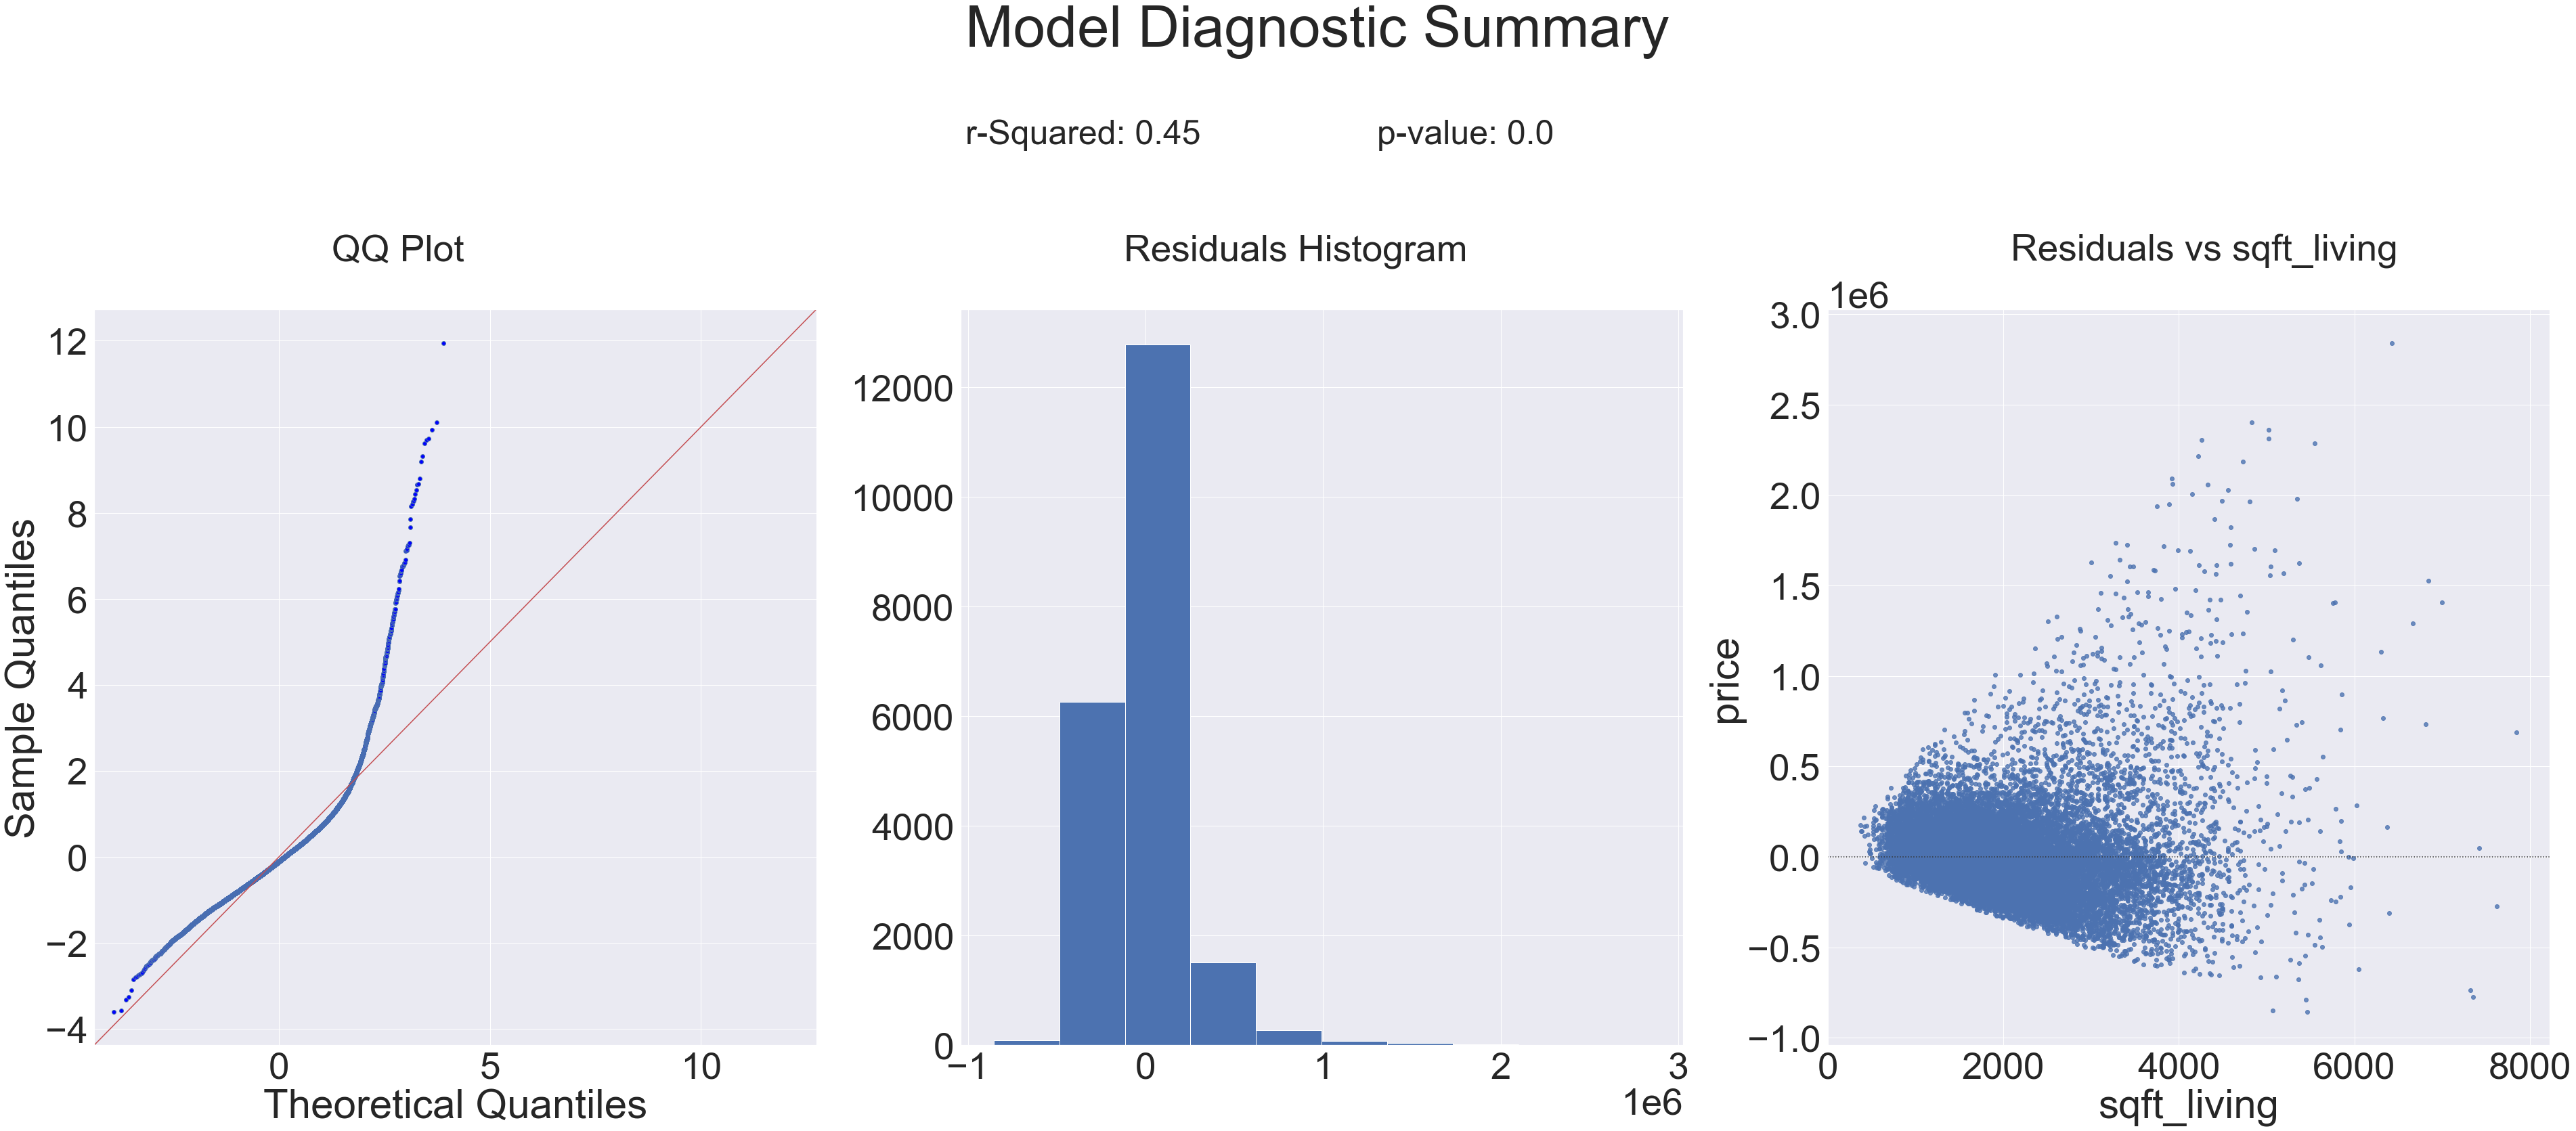

In [53]:
f = 'price~ sqft_living'
sqft_living_model = smf.ols(formula=f, data=df_kc).fit()
model_diagnostic(sqft_living_model, sqft_living, 'sqft_living', price)

In [51]:
dff= 'price_log ~ sqft_living_log'
dff_price_living = ols(formula= dff, data=df_kc).fit()
dff_price_living_summ = dff_price_living.summary()

dff_price_living_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                 1.591e+04
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:44:20   Log-Likelihood:                -9767.2
No. Observations:               21061   AIC:                         1.954e+04
Df Residuals:                   21059   BIC:                         1.955e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.9097      0.049    142.158      0.000       6.814       7.005
sqft_living_log     0.8125      0.006    126.122      0.000       0.800       0.825
==============================================================================
Omnibus:                      109.849   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.625
Skew:                           0.125   Prob(JB):                     3.83e-22
Kurtosis:                       2.777   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

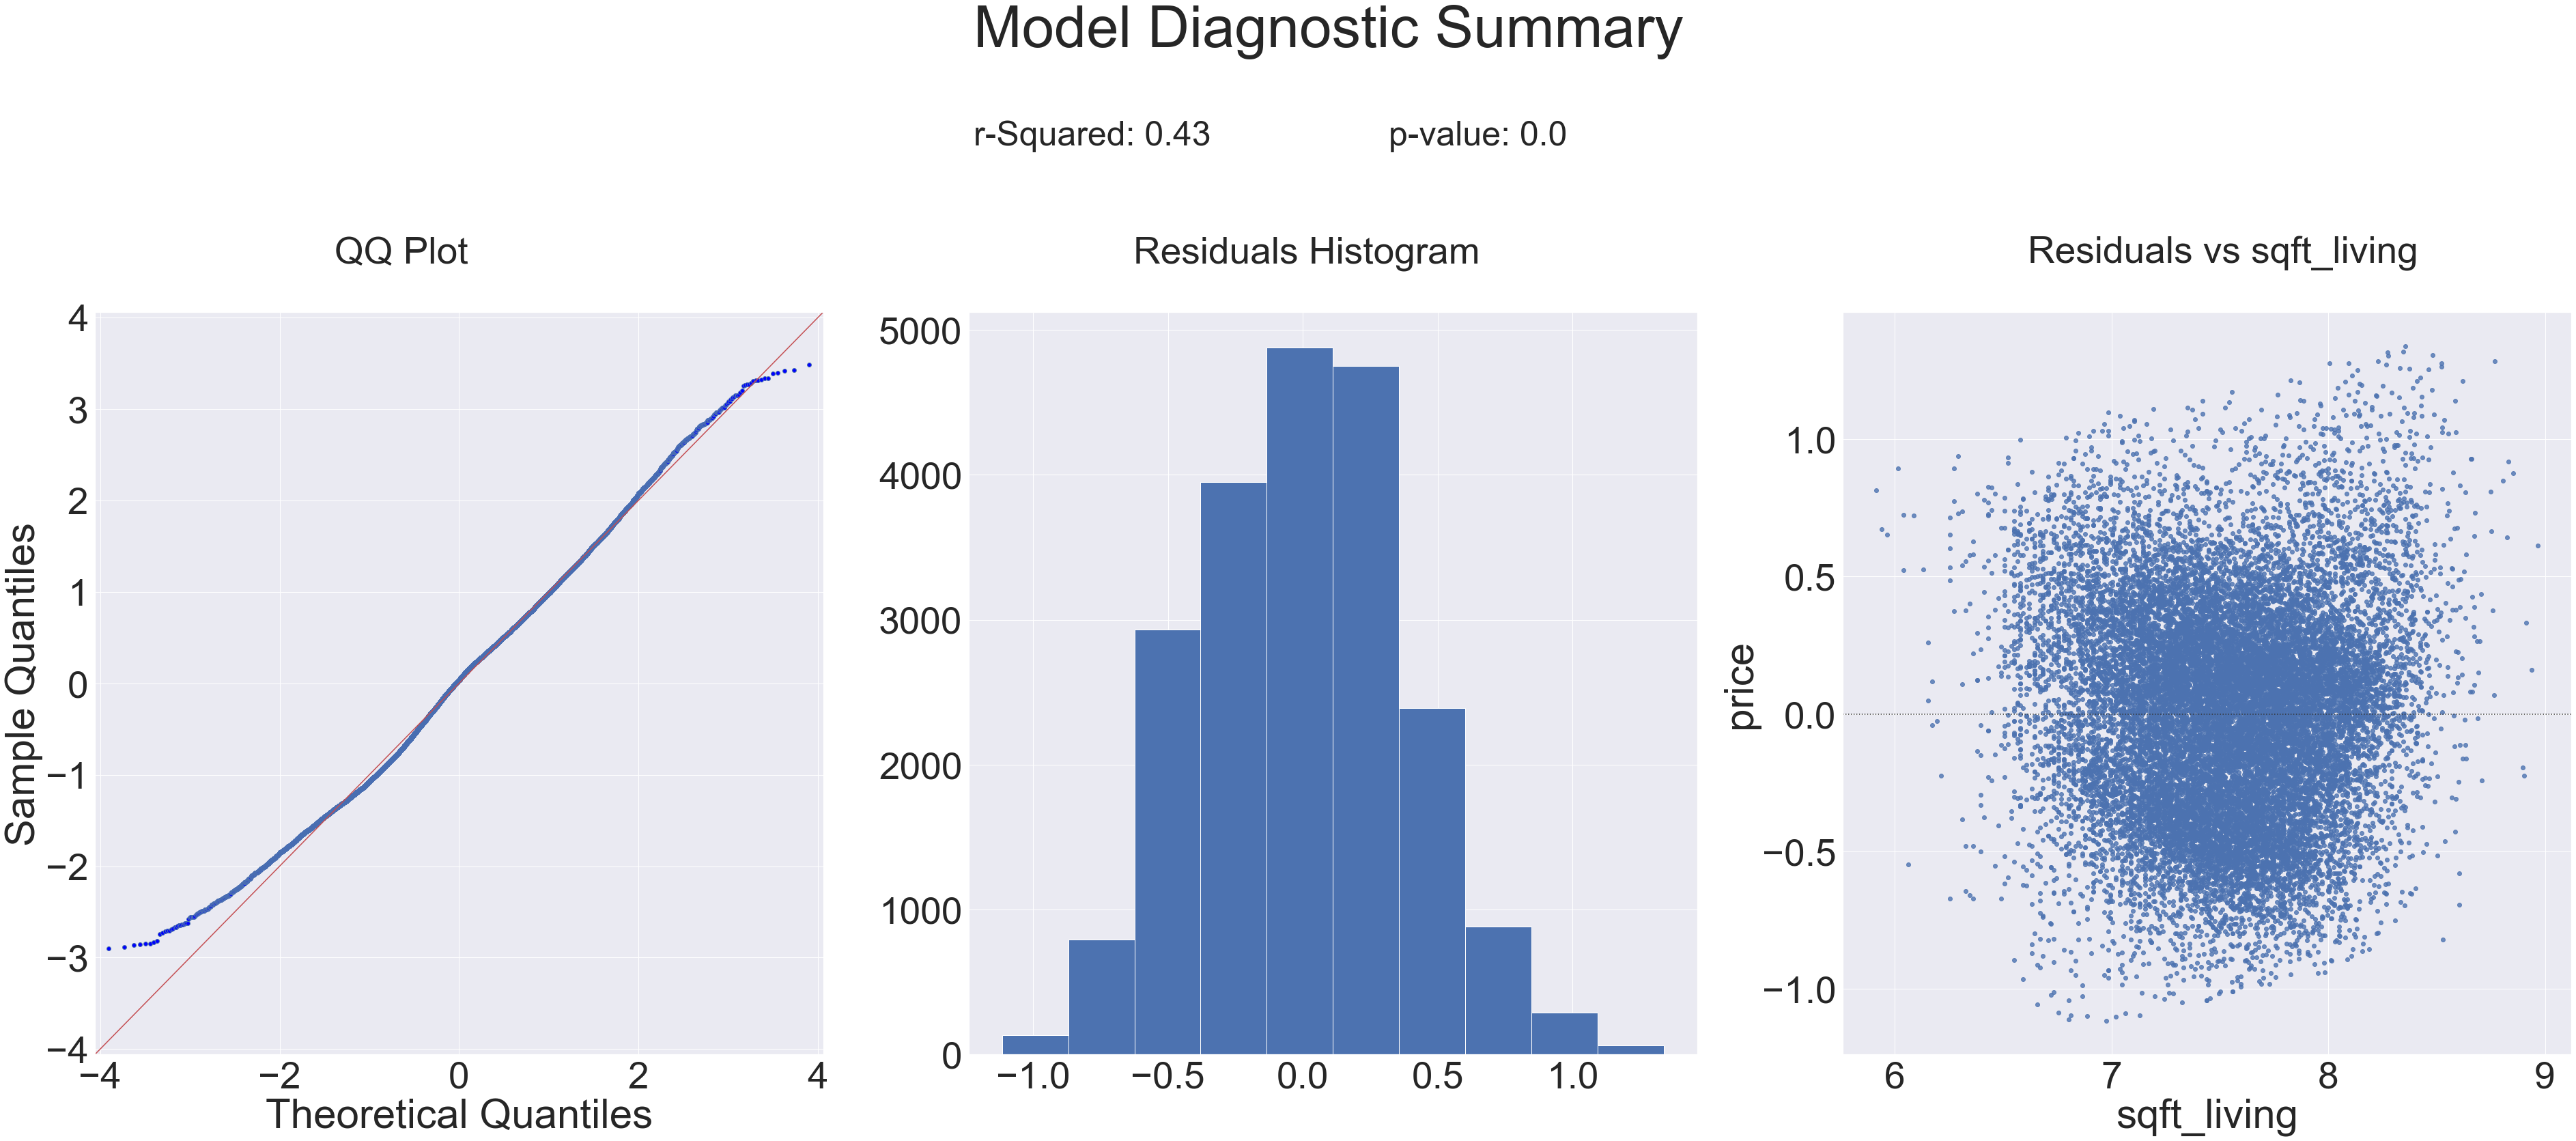

In [52]:
f = 'price_log ~ sqft_living_log'
sqft_living_model = smf.ols(formula=f, data=df_kc).fit()
model_diagnostic(sqft_living_model, sqft_living_log, 'sqft_living', price_log)

In [37]:
dfff= "price ~ grade"
dfff_price_grade = ols(formula= dfff, data=df_kc).fit()
dfff_price_grade_summ = dfff_price_grade.summary()

dfff_price_grade_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.661e+04
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:42:45   Log-Likelihood:            -2.9078e+05
No. Observations:               21061   AIC:                         5.816e+05
Df Residuals:                   21059   BIC:                         5.816e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.067e+05   1.12e+04    -80.797      0.000   -9.29e+05   -8.85e+05
grade       1.876e+05   1455.782    128.887      0.000    1.85e+05     1.9e+05
==============================================================================
Omnibus:                    12618.903   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           222199.117
Skew:                           2.555   Prob(JB):                         0.00
Kurtosis:                      18.070   Cond. No.                         53.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
dfff= "price_log ~ grade_log"
dfff_price_grade = ols(formula= dfff, data=df_kc).fit()
dfff_price_grade_summ = dfff_price_grade.summary()

dfff_price_grade_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                 1.793e+04
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:42:45   Log-Likelihood:                -9206.6
No. Observations:               21061   AIC:                         1.842e+04
Df Residuals:                   21059   BIC:                         1.843e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2454      0.036    230.103      0.000       8.175       8.316
grade_log      2.3684      0.018    133.895      0.000       2.334       2.403
==============================================================================
Omnibus:                      147.545   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.938
Skew:                           0.189   Prob(JB):                     3.74e-34
Kurtosis:                       3.182   Cond. No.                         34.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

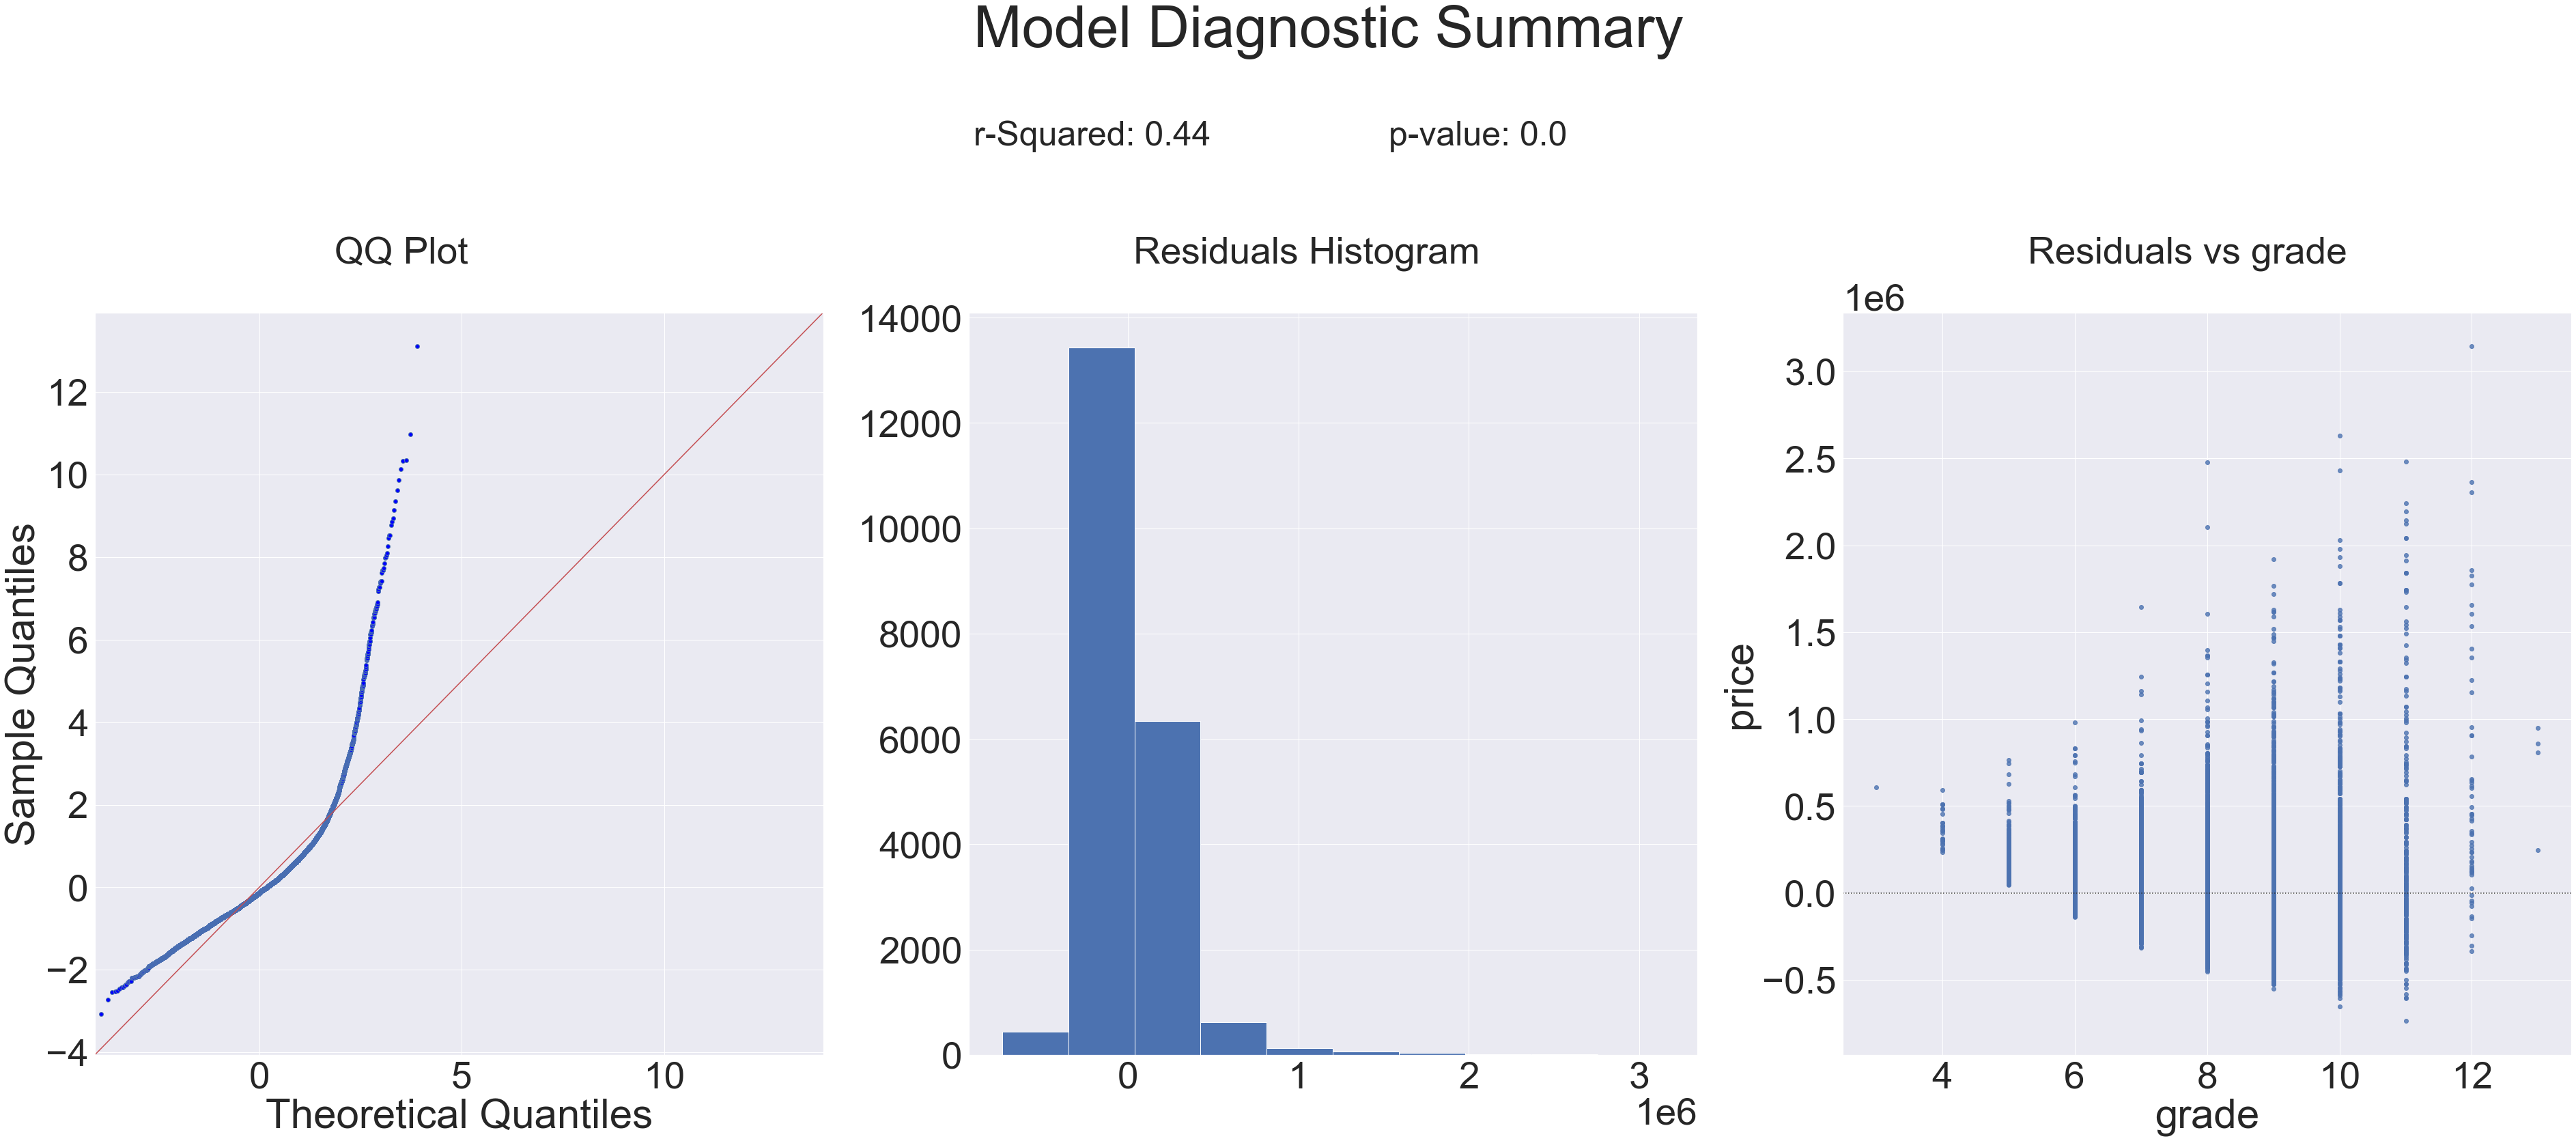

In [39]:
f = 'price ~ grade'
grade_model = smf.ols(formula=f, data=df_kc).fit()
model_diagnostic(grade_model, grade, 'grade', price)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

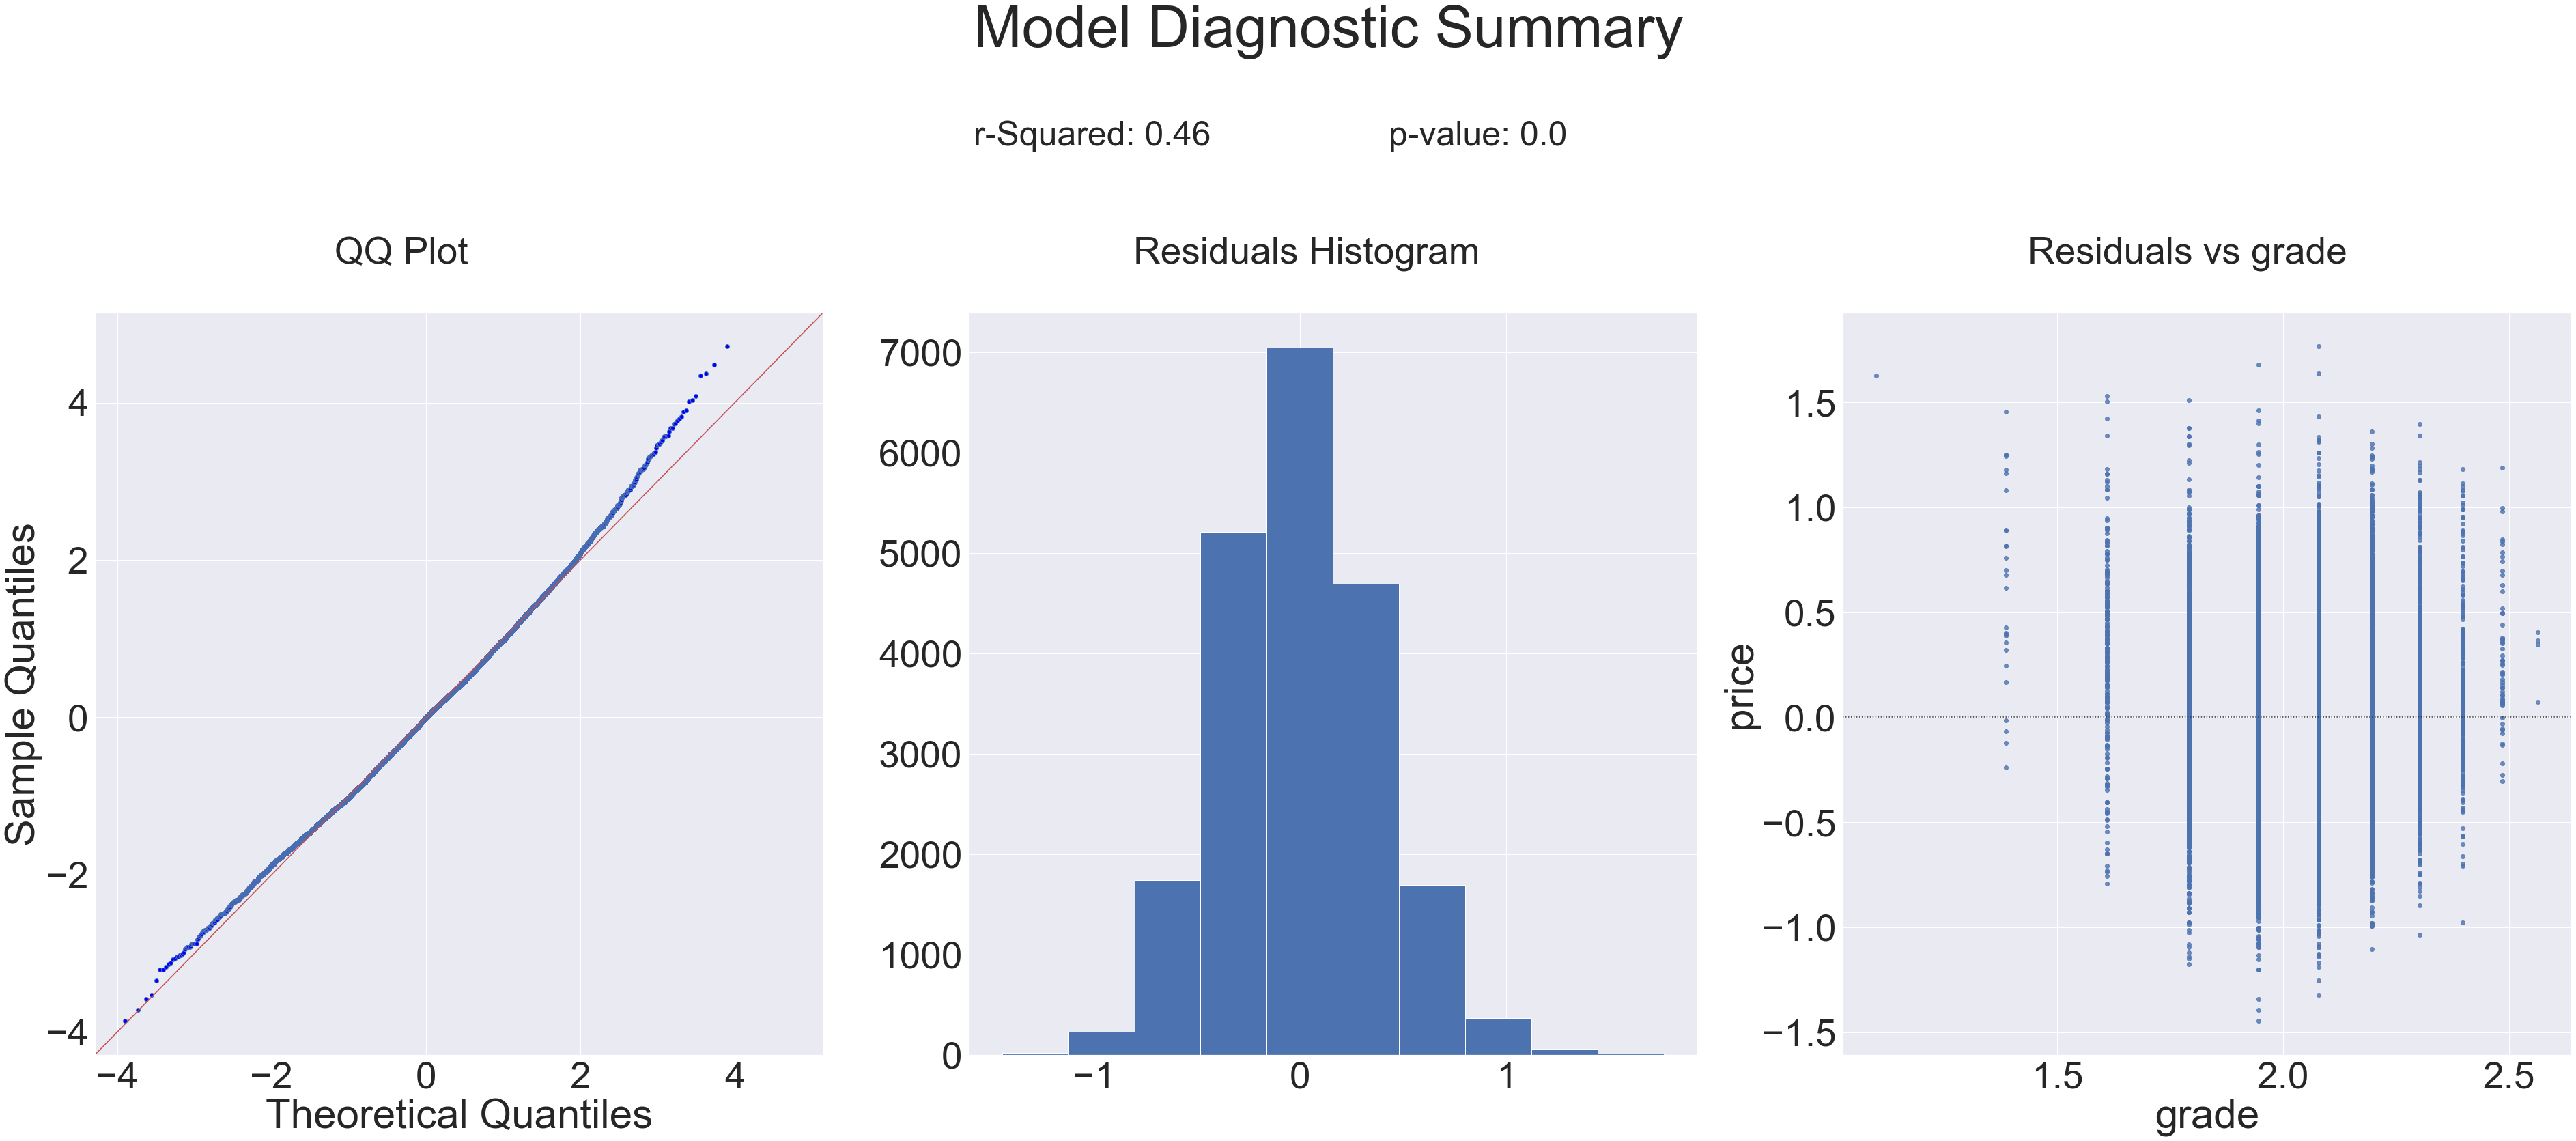

In [40]:
f = 'price_log ~ grade_log'
grade_model = smf.ols(formula=f, data=df_kc).fit()
model_diagnostic(grade_model, grade_log, 'grade', price_log)

In [41]:
#multiple regression model with grade, bathrooms, sqft living, and sqft living 15

model = 'price_log ~ grade_log + bath_log + sqft_living_log + sqft_living15_log'
model_fit = ols(formula= model, data=df_kc).fit()
model_fit_summ = model_fit.summary()

model_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     5788.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:42:47   Log-Likelihood:                -7882.0
No. Observations:               21061   AIC:                         1.577e+04
Df Residuals:                   21056   BIC:                         1.581e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.7069      0.072     79.645      0.000       5.566       5.847
grade_log             1.4264      0.026     54.598      0.000       1.375       1.478
bath_log             -0.1073      0.010    -10.993      0.000      -0.126      -0.088
sqft_living_log       0.3960      0.012     34.431      0.000       0.373       0.419
sqft_living15_log     0.2030      0.012     17.307      0.000       0.180       0.226
==============================================================================
Omnibus:                       63.073   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.587
Skew:                           0.117   Prob(JB):                     4.23e-14
Kurtosis:                       2.874   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#multiple regression model withv grade, bathrooms, sqft living, and sqft living 15

model1 = 'price ~ grade + bath + view + bed + floors + waterfront'
model1_fit = ols(formula= model1, data=df_kc).fit()
model1_fit_summ = model1_fit.summary()

model1_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     3739.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:56:42   Log-Likelihood:            -2.8844e+05
No. Observations:               21002   AIC:                         5.769e+05
Df Residuals:                   20995   BIC:                         5.770e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.123e+05   1.17e+04    -69.347      0.000   -8.35e+05   -7.89e+05
grade       1.617e+05   1859.324     86.976      0.000    1.58e+05    1.65e+05
bath        3.482e+04   3287.897     10.592      0.000    2.84e+04    4.13e+04
view        8.302e+04   2307.915     35.973      0.000    7.85e+04    8.75e+04
bed          1.93e+04   2196.382      8.789      0.000     1.5e+04    2.36e+04
floors     -3.654e+04   3435.598    -10.635      0.000   -4.33e+04   -2.98e+04
waterfront  4.998e+05   2.14e+04     23.311      0.000    4.58e+05    5.42e+05
==============================================================================
Omnibus:                    10969.571   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           165765.473
Skew:                           2.161   Prob(JB):                         0.00
Kurtosis:                      16.067   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#multiple regression model with grade, bathrooms, and sqft living

model = 'price_log ~ grade_log + bath_log + sqft_living_log'
model_fit = ols(formula= model, data=df_kc).fit()
model_fit_summ = model_fit.summary()

model_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     7511.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:42:48   Log-Likelihood:                -8030.7
No. Observations:               21061   AIC:                         1.607e+04
Df Residuals:                   21057   BIC:                         1.610e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.2964      0.063     99.174      0.000       6.172       6.421
grade_log           1.5523      0.025     61.425      0.000       1.503       1.602
bath_log           -0.1157      0.010    -11.782      0.000      -0.135      -0.096
sqft_living_log     0.4878      0.010     47.451      0.000       0.468       0.508
==============================================================================
Omnibus:                       80.832   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.720
Skew:                           0.152   Prob(JB):                     1.80e-18
Kurtosis:                       2.989   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""